<a href="https://colab.research.google.com/github/BradJohnson6/STC510/blob/main/module_3_essentials_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#importing the necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [13]:
#reading the data in a pandas dataframe, not putting the INC number as index column because I'm not positive it's unique although I think it is
crime = pd.read_csv('crimestat (1).csv', engine ='python', on_bad_lines='skip')

In [14]:
#renaming a column to make it easier to work with
crime = crime.rename(columns={'UCR CRIME CATEGORY':'UCR_CRIME_CATEGORY', 'PREMISE TYPE': 'PREMISE_TYPE'})

In [15]:
#median household income taken from https://simplemaps.com/city/phoenix/zips/income-household-median and put into a csv

In [16]:
#reading in and previewing the income csv
income = pd.read_csv('median_income.csv')
income.head()

,ZIP,Median_Income
0,85003,44140
1,85004,41951
2,85006,38121
3,85007,34667
4,85008,43574


In [17]:
#converting the ZIP's into floats to match the previous dataframe 
income['ZIP'] = income['ZIP'].astype(float)
income

,ZIP,Median_Income
0,85003.0,44140
1,85004.0,41951
2,85006.0,38121
3,85007.0,34667
4,85008.0,43574
5,85009.0,32893
6,85012.0,70228
7,85013.0,56402
8,85014.0,53551
9,85015.0,38019


In [18]:
#creating a dataframe out of the value counts
agg = crime.ZIP.value_counts().rename_axis("ZIP").reset_index(name="Total_Crime")
agg

,ZIP,Total_Crime
0,85015.0,6963
1,85008.0,6320
2,85009.0,5513
3,85041.0,5477
4,85051.0,5389
...,...,...
93,85203.0,1
94,85266.0,1
95,85381.0,1
96,85268.0,1


In [19]:
#Joining the two dataframes to create a data frame with ZIP code median house income and total crime for that zip code
crime_income = income.merge(right= agg, on='ZIP' )
crime_income

,ZIP,Median_Income,Total_Crime
0,85003.0,44140,1513
1,85004.0,41951,1650
2,85006.0,38121,2661
3,85007.0,34667,2000
4,85008.0,43574,6320
5,85009.0,32893,5513
6,85012.0,70228,826
7,85013.0,56402,2823
8,85014.0,53551,2275
9,85015.0,38019,6963


In [20]:
#grouping crime by Zip code
zipagg = crime.groupby('ZIP')
zipagg.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR_CRIME_CATEGORY,100 BLOCK ADDR,ZIP,PREMISE_TYPE
0,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
2,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
3,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
4,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE
...,...,...,...,...,...,...,...
122614,201700001746542,09/29/2017 08:00,09/29/2017 22:00,AGGRAVATED ASSAULT,87XX W HARBOR BLVD,85383.0,LAKE / WATERWAY / BEACH
123416,201700001736938,10/03/2017 11:00,10/03/2017 14:30,LARCENY-THEFT,15XX W SAN PEDRO ST,85233.0,HOSPITAL
125511,201700001816063,10/14/2017 19:00,10/15/2017 00:30,LARCENY-THEFT,42XX W THOMAS RD,85396.0,OFFICE / COMMERCIAL BUILDING
126451,201700001846575,10/19/2017 18:30,10/20/2017 04:30,MOTOR VEHICLE THEFT,27XX N 32ND ST,85213.0,PARKING LOT


In [21]:
#getting the type of crime that is occuring at each zip code
zipagg.UCR_CRIME_CATEGORY.value_counts()

ZIP      UCR_CRIME_CATEGORY 
85003.0  LARCENY-THEFT          758
         DRUG OFFENSE           194
         BURGLARY               179
         MOTOR VEHICLE THEFT    128
         AGGRAVATED ASSAULT     120
                               ... 
85395.0  AGGRAVATED ASSAULT       1
         RAPE                     1
85396.0  LARCENY-THEFT            2
         BURGLARY                 1
         MOTOR VEHICLE THEFT      1
Name: UCR_CRIME_CATEGORY, Length: 561, dtype: int64

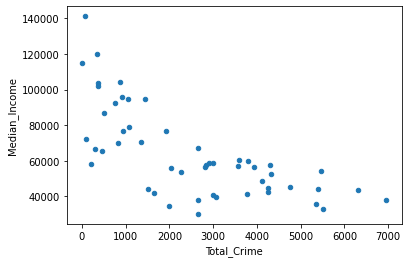

In [22]:
#scatter plot showing the income along with the crime rates for each zip code, as you can see there is a strong inverse relationship with income and crime rates
crime_income.plot(x="Total_Crime", y="Median_Income", kind="scatter",)

In [24]:
#creating a new dataframe grouping by crime category
crimetype = crime.groupby(['UCR_CRIME_CATEGORY'])

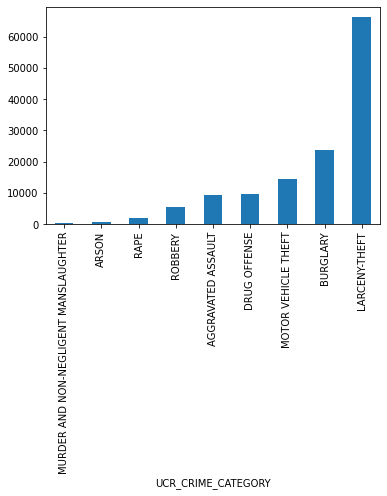

In [25]:
#creating a bargraph showing the number of each crime across the Phoenix metro area
crimetype.ZIP.count().sort_values().plot.bar()